In [2]:

#General use and needed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For Preprocessing
import sklearn as sc
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#For non GPU function acceleration
from numba import jit


#For Neural net training
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow.keras.metrics

#check if gpu is availble (requires cuda toolkit and cuda deep learning library)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
df = pd.read_csv("SP500.csv")
df.head()

,Date,Open,High,Low,Close
0,04/01/22,4540.32,4548.70,4507.57,4545.86
1,03/31/22,4599.02,4603.07,4530.41,4530.41
2,03/30/22,4624.20,4627.77,4581.32,4602.45
3,03/29/22,4602.86,4637.30,4589.66,4631.60
4,03/28/22,4541.09,4575.65,4517.69,4575.52


In [4]:
df = df.sort_index(ascending=False)
df.head()

,Date,Open,High,Low,Close
5598,01/03/00,1455.22,1478.00,1438.36,1455.22
5597,01/04/00,1399.42,1455.22,1397.43,1399.42
5596,01/05/00,1402.11,1413.27,1377.68,1402.11
5595,01/06/00,1403.45,1411.90,1392.02,1403.45
5594,01/07/00,1441.47,1441.47,1400.53,1441.47


In [5]:
dfTrain = df.iloc[:, lambda df: [4]]
print(dfTrain)
dfTrain.info()

        Close
5598  1455.22
5597  1399.42
5596  1402.11
5595  1403.45
5594  1441.47
...       ...
4     4575.52
3     4631.60
2     4602.45
1     4530.41
0     4545.86

[5599 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5599 entries, 5598 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    Close  5599 non-null   float64
dtypes: float64(1)
memory usage: 87.5 KB


In [6]:
print(dfTrain)
#print(dfTrain.shape)
dfTrain.info()

        Close
5598  1455.22
5597  1399.42
5596  1402.11
5595  1403.45
5594  1441.47
...       ...
4     4575.52
3     4631.60
2     4602.45
1     4530.41
0     4545.86

[5599 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5599 entries, 5598 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    Close  5599 non-null   float64
dtypes: float64(1)
memory usage: 87.5 KB


In [7]:
scaler = MinMaxScaler(feature_range =(0,1))
scaled_df = scaler.fit_transform(dfTrain)
scaled_df.shape

(5599, 1)

In [13]:
X_train = []
y_train = []

for i in range (30,5599): #1 : timestep // 5599 : length of the data
    X_train.append(scaled_df[i-30:i,0]) 
    y_train.append(scaled_df[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [14]:
print(X_train.shape)
#print(y_train.shape)

(5569, 30)


In [15]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(5569, 30, 1)


In [16]:

#Code to load existing model
#regressor = Sequential()
#regressor = tensorflow.keras.models.load_model("S&P500_Model")
#hist = regressor



In [64]:
#initializing the RNN
regressor = Sequential()


#Using LSTM (I tried a few other RNN types but this seemed to work the best)
#Adding the first layer LSTM and some Dropout Regularisations
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding the second layer LSTM and some Dropout Regularisations
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))


#Adding the Third layer LSTM and some Dropout Regularisations
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

#Adding the Fourth and final layer layer LSTM and some Dropout Regularisations
regressor.add(LSTM(units = 50, return_sequences= False))
regressor.add(Dropout(0.2))

#adds a denisty layer with 1 unit
regressor.add(Dense(units = 1))

#compiles model using adamax optimizer and includes accuracy metric and mean squared error
#Tried several other options adamax did the best with the next best being adam
regressor.compile(optimizer ='Adamax', loss = 'mean_squared_error', metrics=['accuracy'])


In [82]:
#Actually train the model

@jit(forceobj=True)
def trainModel(X_train, y_train):
    hist = regressor.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)
    return hist
    
    
hist = trainModel(X_train, y_train)


Epoch 1/10
175/175 - 5s - loss: 0.0048 - accuracy: 3.5913e-04 - 5s/epoch - 30ms/step
Epoch 2/10
175/175 - 2s - loss: 0.0018 - accuracy: 3.5913e-04 - 2s/epoch - 11ms/step
Epoch 3/10
175/175 - 2s - loss: 0.0016 - accuracy: 3.5913e-04 - 2s/epoch - 11ms/step
Epoch 4/10
175/175 - 2s - loss: 0.0014 - accuracy: 3.5913e-04 - 2s/epoch - 11ms/step
Epoch 5/10
175/175 - 2s - loss: 0.0014 - accuracy: 3.5913e-04 - 2s/epoch - 11ms/step
Epoch 6/10
175/175 - 2s - loss: 0.0013 - accuracy: 3.5913e-04 - 2s/epoch - 11ms/step
Epoch 7/10
175/175 - 2s - loss: 0.0013 - accuracy: 3.5913e-04 - 2s/epoch - 11ms/step
Epoch 8/10
175/175 - 2s - loss: 0.0012 - accuracy: 3.5913e-04 - 2s/epoch - 11ms/step
Epoch 9/10
175/175 - 2s - loss: 0.0012 - accuracy: 3.5913e-04 - 2s/epoch - 11ms/step
Epoch 10/10
175/175 - 2s - loss: 0.0011 - accuracy: 3.5913e-04 - 2s/epoch - 11ms/step


In [44]:
#if training model uncomment line to save a new model

#Need custom object parameters
#regressor.save("S&P500_Model")




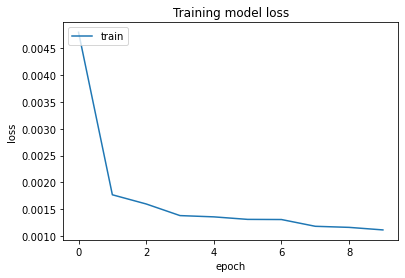

In [83]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [84]:
testData = pd.read_csv('SP500.csv')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
testData = testData.sort_index(ascending=False)
y_test = testData.iloc[30:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = scaler.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 30
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
   # print(X_test)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape
#print(X_test)

(5569, 30, 1)

In [85]:
y_pred = regressor.predict(X_test)


In [86]:
y_pred = np.reshape(y_pred,(y_pred.shape[0],y_pred.shape[1]))
print(X_train.shape)
predicted_price = scaler.inverse_transform(y_pred)
print((predicted_price))


(5569, 30, 1)
[[1387.8099]
 [1386.5647]
 [1385.826 ]
 ...
 [4242.106 ]
 [4250.281 ]
 [4260.246 ]]


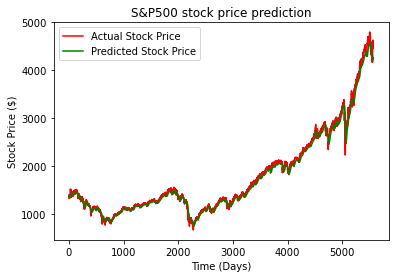

In [87]:

#Graph the predicted price vs actual price
#Graph starts on 1/3/2000 (earliest date market watch had in a csv and ends on april 1/1/2022
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('S&P500 stock price prediction')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.show()



In [ ]:
#Todo 
#Add model saving/loading < Somewhat working


#Add method to predict abitrary date < Need to learn how it works
#Add method to convert x time on graph to date or fetch date from row
#Code Clean up
#Long Training session for most accurate model


#Once Everything else is done Todo
#numba jit acceleration
#Test in real world
#Enhance model with more layers or increased density
#Test Again
#real time data streaming via yahoo finance python module or similar

#Distant Future
#Try using it for trading?
#Build high speed trading server out of computer hardware?